# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [7]:
df[['Country', 'Region']].describe()

,Country,Region
count,227,227
unique,227,11
top,Senegal,SUB-SAHARAN AFRICA
freq,1,51


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-           <br>
2-           <br>
3-           <br>

In [10]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [11]:
#solution "object columns"
object_columns=['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']
df_copy[object_columns]=df_copy[object_columns].stack().str.replace(',','.').unstack()
df_copy[object_columns]=df_copy[object_columns].astype('float64')
df_copy['Country'], Categorical= pd.factorize(df_copy['Country'])
df_copy['Region'], Categorical= pd.factorize(df_copy['Region'])

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    int64  
 1   Region                              227 non-null    int64  
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [13]:
df_copy.duplicated().sum()

0

**Second issue**

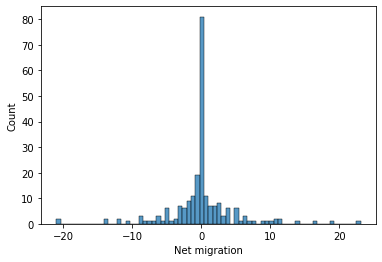

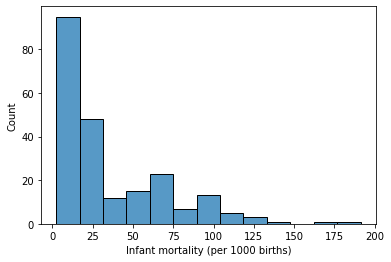

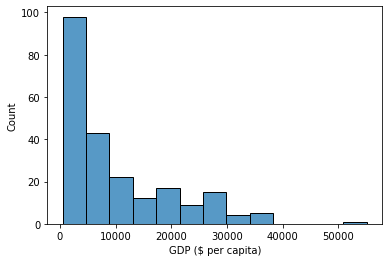

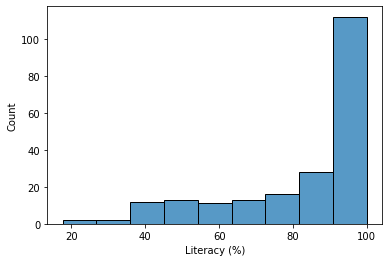

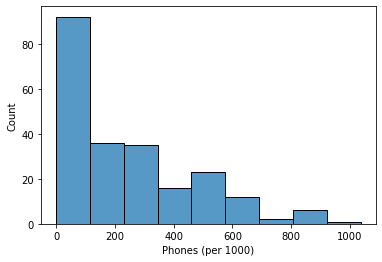

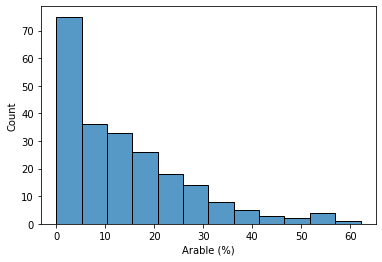

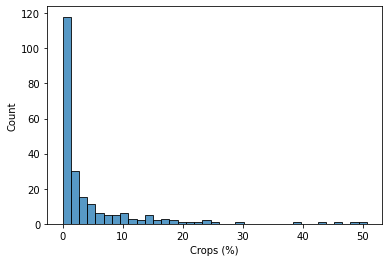

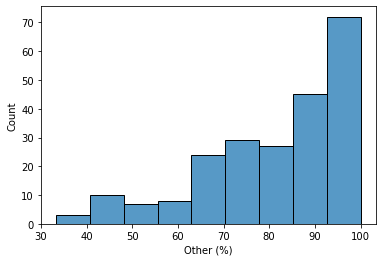

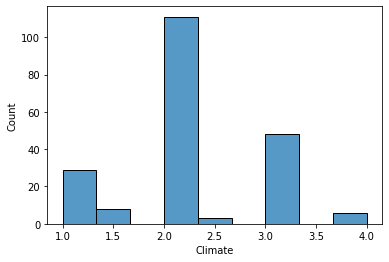

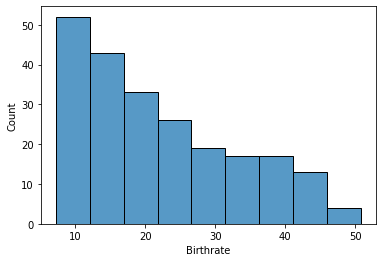

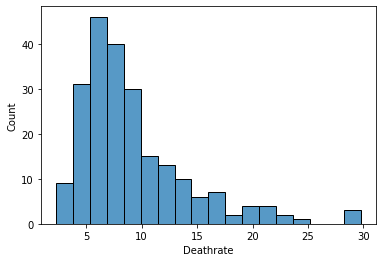

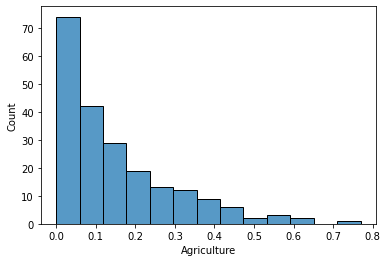

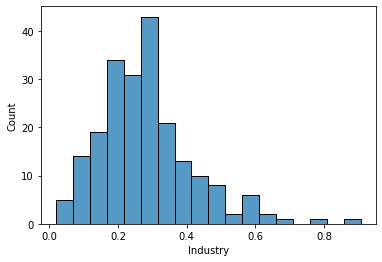

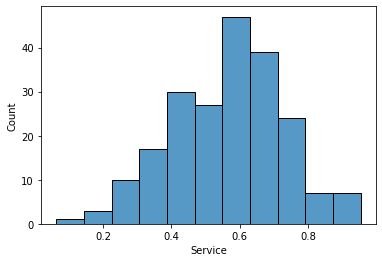

In [14]:
#distribution of columns with nulls 
quantitative_nulls=[
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']
for i in quantitative_nulls :
    sns.histplot(df_copy[i])
    plt.show()


In [15]:
### dealing with nulls
df_copy['Net migration'].fillna(value = df_copy['Net migration'].value_counts().index[0], inplace = True)
df_copy['Infant mortality (per 1000 births)'].fillna(value = df_copy['Infant mortality (per 1000 births)'].value_counts().index[0], inplace = True)
df_copy['GDP ($ per capita)'].fillna(value = df_copy['GDP ($ per capita)'].value_counts().index[0], inplace = True)
df_copy['Phones (per 1000)'].fillna(value = df_copy['Phones (per 1000)'].value_counts().index[0], inplace = True)
df_copy['Arable (%)'].fillna(value = df_copy['Arable (%)'].value_counts().index[0], inplace = True)
df_copy['Crops (%)'].fillna(value = df_copy['Crops (%)'].value_counts().index[0], inplace = True)
df_copy['Other (%)'].fillna(value = df_copy['Other (%)'].value_counts().index[0], inplace = True)
df_copy['Birthrate'].fillna(value = df_copy['Birthrate'].value_counts().index[0], inplace = True)
df_copy['Deathrate'].fillna(value = df_copy['Deathrate'].value_counts().index[0], inplace = True)
df_copy['Literacy (%)'].fillna(value = df_copy['Literacy (%)'].mean(), inplace = True)
df_copy['Climate'].fillna(value = df_copy['Climate'].mean(), inplace = True)
df_copy['Agriculture'].fillna(value = df_copy['Agriculture'].mean(), inplace = True)
df_copy['Industry'].fillna(value = df_copy['Industry'].mean(), inplace = True)
df_copy['Service'].fillna(value = df_copy['Service'].mean(), inplace = True)

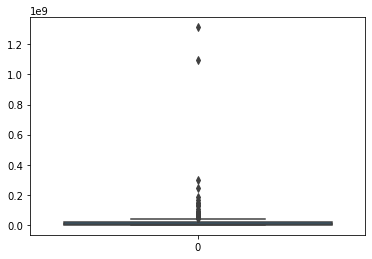

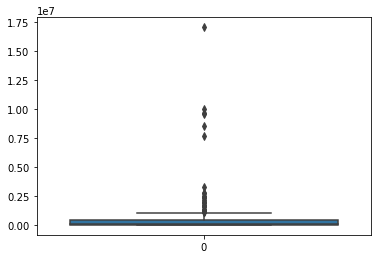

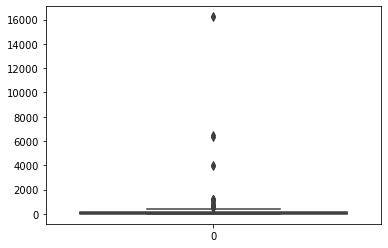

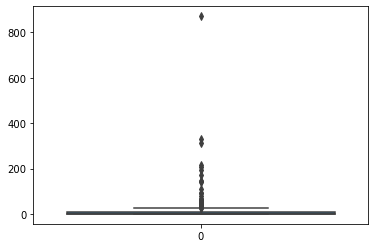

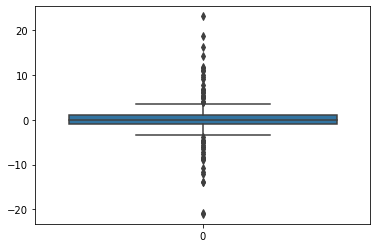

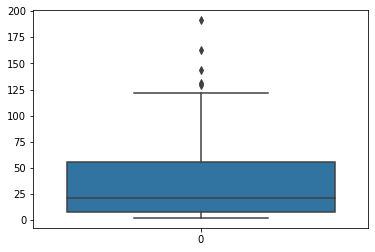

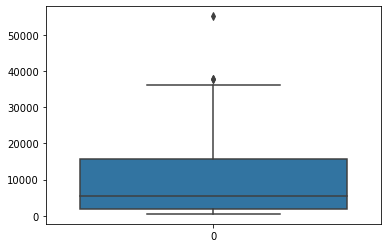

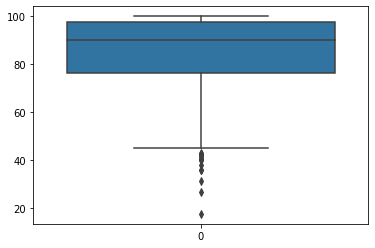

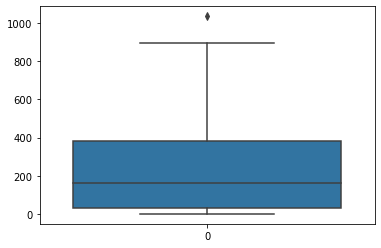

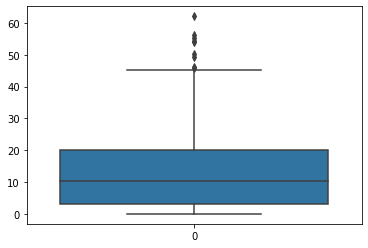

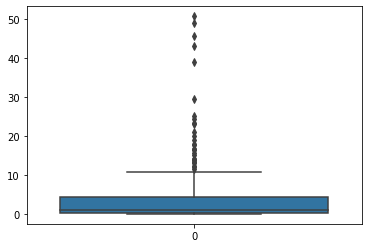

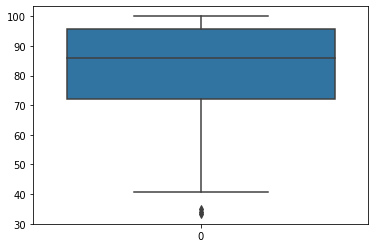

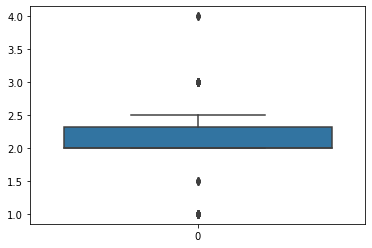

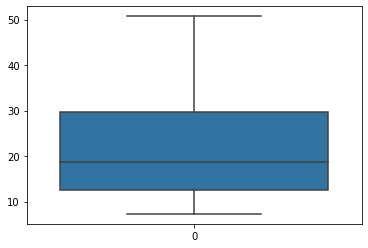

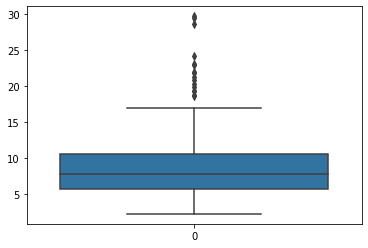

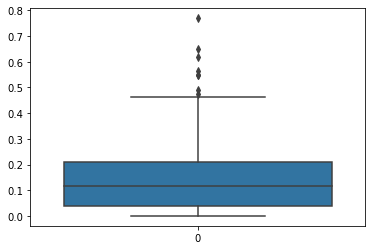

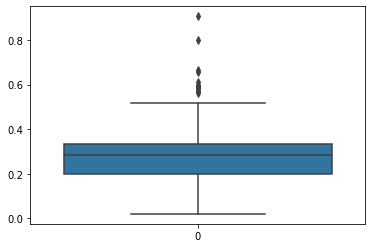

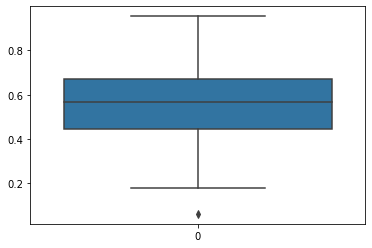

In [16]:
## outliers
quantitative=['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']
for i in quantitative :
    sns.boxplot(data=df_copy[i])
    plt.show()


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [17]:
from sklearn import preprocessing

In [18]:
min_max_scaler =preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df_copy)

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

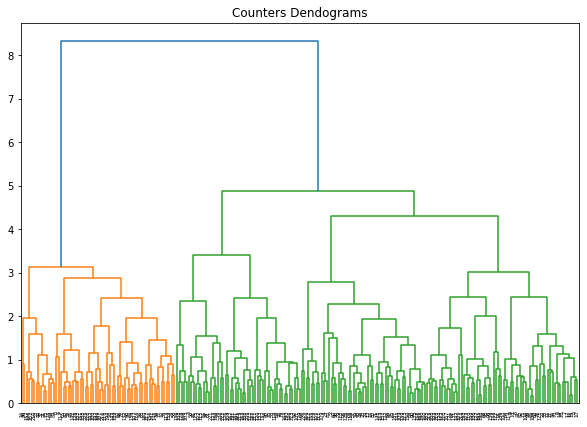

In [19]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_scaled , method = 'ward', metric = "euclidean" )) #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [20]:
#training
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage="ward",affinity='euclidean')
agglom.fit_predict(df_scaled)

array([2, 1, 1, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 5, 0, 0, 0, 1, 5,
       0, 2, 1, 1, 2, 0, 0, 1, 3, 5, 2, 5, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1,
       5, 2, 2, 1, 1, 5, 3, 4, 0, 3, 3, 2, 4, 4, 2, 1, 1, 4, 2, 2, 0, 2,
       0, 1, 0, 3, 0, 1, 2, 5, 4, 0, 3, 2, 0, 3, 1, 4, 0, 1, 1, 0, 2, 2,
       1, 5, 1, 0, 3, 0, 5, 1, 1, 1, 0, 0, 0, 3, 4, 0, 0, 1, 0, 2, 4, 1,
       0, 1, 1, 2, 0, 4, 2, 2, 1, 3, 3, 0, 0, 3, 2, 5, 1, 1, 2, 3, 4, 0,
       2, 3, 2, 1, 4, 3, 0, 1, 1, 2, 2, 2, 1, 2, 3, 0, 1, 0, 1, 2, 5, 1,
       0, 1, 2, 1, 1, 2, 1, 1, 3, 3, 3, 0, 1, 0, 3, 0, 5, 0, 0, 4, 0, 4,
       3, 0, 4, 1, 2, 3, 4, 2, 0, 3, 0, 1, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 3, 5, 4, 3, 3, 4, 2, 0, 1, 5, 3, 1, 3, 0, 0, 2, 2, 0, 3,
       0, 4, 4, 1, 1, 2, 2], dtype=int64)

Text(0, 0.5, 'silhoutte scoe')

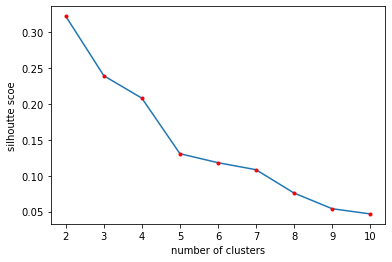

In [21]:
from sklearn.metrics import silhouette_samples,silhouette_score
# running the algorith with dif number of clusters and linkage single
scores=[]

for i in range(2,11):
    scores.append(silhouette_score(df_scaled,AgglomerativeClustering(n_clusters=i,linkage="single").fit_predict(df_scaled)))
plt.plot(range(2,11),scores) 
plt.plot(range(2,11),scores,'.r')
plt.xlabel("number of clusters")
plt.ylabel("silhoutte scoe")                      

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents)

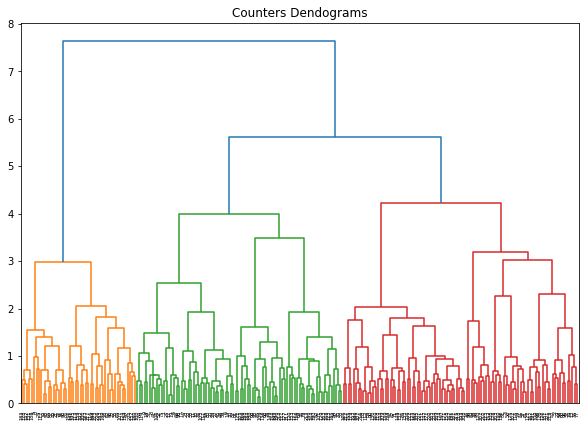

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=principalDf , method = 'ward', metric = "euclidean" ))